<a href="https://colab.research.google.com/github/gohibi/pythonbases/blob/main/test_12_et_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
RANDOM_SEED = 139
def get_labels(data):
    labels = []
    for idx, item in enumerate(data):
        if item[0]**2 + item[1]**2 < 1:
            labels.append(0)
        elif item[0] > 2 and item[1] > 2:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(labels)

In [ ]:
N = 500
train_data = 7 * np.random.random_sample((N,2)) - np.array([3,3])

train_labels = get_labels(train_data)
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

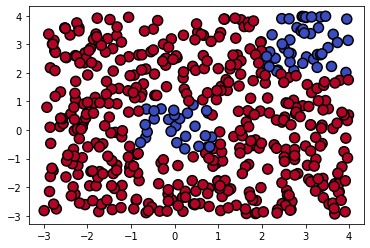

In [ ]:
shallow_rf = RandomForestClassifier(n_estimators=5, max_depth=100, n_jobs=-1, 
                                    random_state=RANDOM_SEED)
deep_rf = RandomForestClassifier(n_estimators=5, max_depth=100, n_jobs=-1, 
                                 random_state=RANDOM_SEED)

# training the tree
shallow_rf.fit(train_data, train_labels)
deep_rf.fit(train_data, train_labels)
# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted_shallow = shallow_rf.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
predicted_deep = deep_rf.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)

plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

Text(0.5, 1.0, 'Deep Random Forest')

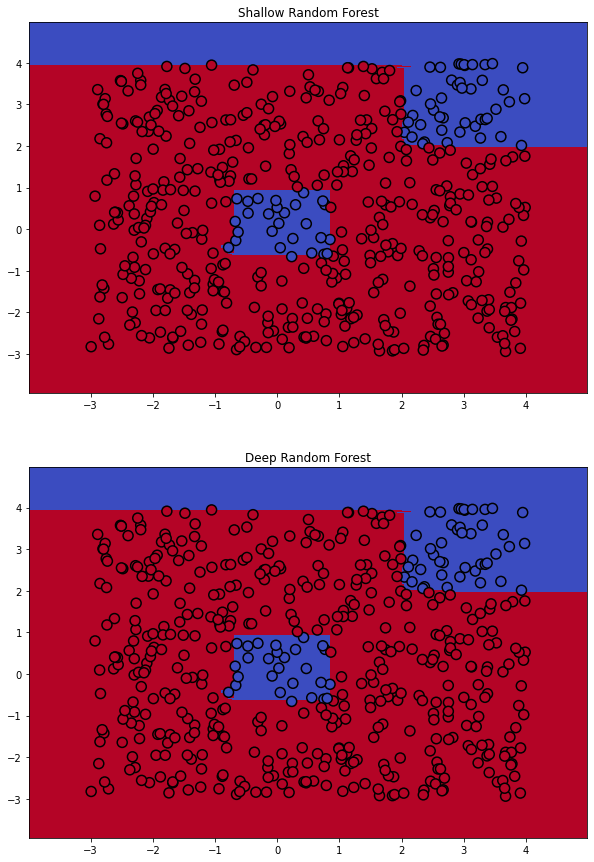

In [ ]:
ig, ax = plt.subplots(2, 1, figsize=(10,15))

ax[0].pcolormesh(xx, yy, predicted_shallow, cmap='coolwarm')
ax[0].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);
ax[0].set_title('Shallow Random Forest')

ax[1].pcolormesh(xx, yy, predicted_deep, cmap='coolwarm')
ax[1].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);
ax[1].set_title('Deep Random Forest')

In [ ]:
spam = pd.read_csv('spam7.csv')


In [ ]:
spam

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,yesno
0,1,278,0.000,0.778,0.00,0.00,0.00,y
1,2,1028,0.180,0.372,0.43,0.43,0.21,y
2,3,2259,0.184,0.276,0.06,1.16,0.06,y
3,4,191,0.000,0.137,0.00,0.00,0.00,y
4,5,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...,...
4596,4597,88,0.000,0.000,0.00,0.00,0.31,n
4597,4598,14,0.000,0.353,0.00,0.00,0.00,n
4598,4599,118,0.000,0.000,0.00,0.00,0.30,n
4599,4600,78,0.000,0.000,0.00,0.00,0.96,n


In [ ]:
def col_spam(row):
  if row['yesno'] == 'y':
    return 1
  else:
    return 0
spam['spam'] = spam.apply (lambda row: col_spam(row), axis=1)

In [ ]:
spam

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,yesno,spam
0,1,278,0.000,0.778,0.00,0.00,0.00,y,1
1,2,1028,0.180,0.372,0.43,0.43,0.21,y,1
2,3,2259,0.184,0.276,0.06,1.16,0.06,y,1
3,4,191,0.000,0.137,0.00,0.00,0.00,y,1
4,5,191,0.000,0.135,0.00,0.00,0.00,y,1
...,...,...,...,...,...,...,...,...,...
4596,4597,88,0.000,0.000,0.00,0.00,0.31,n,0
4597,4598,14,0.000,0.353,0.00,0.00,0.00,n,0
4598,4599,118,0.000,0.000,0.00,0.00,0.30,n,0
4599,4600,78,0.000,0.000,0.00,0.00,0.96,n,0


In [ ]:
spam.pop('Unnamed: 0')

0          1
1          2
2          3
3          4
4          5
        ... 
4596    4597
4597    4598
4598    4599
4599    4600
4600    4601
Name: Unnamed: 0, Length: 4601, dtype: int64

In [ ]:
spam.pop('yesno')

0       y
1       y
2       y
3       y
4       y
       ..
4596    n
4597    n
4598    n
4599    n
4600    n
Name: yesno, Length: 4601, dtype: object

In [ ]:
spam

,crl.tot,dollar,bang,money,n000,make,spam
0,278,0.000,0.778,0.00,0.00,0.00,1
1,1028,0.180,0.372,0.43,0.43,0.21,1
2,2259,0.184,0.276,0.06,1.16,0.06,1
3,191,0.000,0.137,0.00,0.00,0.00,1
4,191,0.000,0.135,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,0
4597,14,0.000,0.353,0.00,0.00,0.00,0
4598,118,0.000,0.000,0.00,0.00,0.30,0
4599,78,0.000,0.000,0.00,0.00,0.96,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
features_pred =['crl.tot','dollar','bang','money','n000','make']
X=spam[features_pred] #features predicted
y=spam['spam'] #target variable



**ТЕСТ 14**

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

dbscan = DBSCAN(eps=0.9,
                min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)

n_clusters_ = len(set(y_pred)) - (1 if -1 in y_pred else 0)
print('Estimated number of clusters: %d' % n_clusters_)
n_noise_ = list(y_pred).count(-1)
print('Estimated number of noise points: %d' % n_noise_)



Estimated number of clusters: 3
Estimated number of noise points: 368


In [ ]:
dbscan = DBSCAN(eps=0.8,
                min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)
n_noise = list(y_pred).count(-1)
print('Estimated number of noise points: %d' % n_noise)


Estimated number of noise points: 583


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)
gm_pred = gm.predict(X)
silhouette_score(X=X, labels=gm_pred, metric='euclidean')


0.49893287606943293

Сравните результаты кластеризации четырёх рассмотренных алгоритмов на исходном датасете при помощи коэффициента силуэта, инициализируйте алгоритмы со следующими параметрами:

K-means — n_clusters=3, random_state=42
EM-алгоритм (GaussianMixture) — n_components=3, random_state=42
Агломеративная кластеризация – n_clusters=3
DBSCAN – eps=0.9, min_samples=35
Укажите максимальное значение коэффициента силуэта, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

**K-means — n_clusters=3, random_state=42**

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_.astype(np.int)
kmeans_silhouette_coeff = silhouette_score(X=X, labels=kmeans_pred)
print("Silhouette Coefficient: %0.3f" %kmeans_silhouette_coeff )

Silhouette Coefficient: 0.513


**EM-алгоритм (GaussianMixture) — n_components=3, random_state=42**

In [ ]:
gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)
gm_pred = gm.predict(X)
gm_silhouette_coeff =silhouette_score(X=X, labels=gm_pred)
print("Silhouette Coefficient: %0.3f" %gm_silhouette_coeff)

Silhouette Coefficient: 0.499


**Агломеративная кластеризация – n_clusters=3**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3)
clustering.fit(X)
labels_clustering=clustering.labels_.astype(np.int)
cluster_silhouette_coeff = silhouette_score(X=X, labels=labels_clustering)
print("Silhouette Coefficient: %0.3f" %cluster_silhouette_coeff )

Silhouette Coefficient: 0.481


**DBSCAN – eps=0.9, min_samples=35**

In [ ]:
dbscan = DBSCAN(eps=0.9,
                min_samples=35)
dbscan.fit(X)
labels_dbscan = dbscan.labels_.astype(np.int)

dbscan_silhouette_coeff=silhouette_score(X=X, labels=labels_dbscan)
print("Silhouette Coefficient: %0.3f" %dbscan_silhouette_coeff )

Silhouette Coefficient: 0.445


In [ ]:
coeff=[kmeans_silhouette_coeff, gm_silhouette_coeff,cluster_silhouette_coeff,dbscan_silhouette_coeff]
max_silhouette_coefficient = max(coeff)
print(coeff)
print(max_silhouette_coefficient.round(3))

[0.5131209788437305, 0.49893287606943293, 0.4811992210663849, 0.4454335539277996]
0.513


Подберите оптимальное количество кластеров с помощью коэффициента силуэта. Для этого найдите такое число кластеров, при котором значение коэффициента будет максимальным.

В трёх из рассмотренных нами алгоритмов необходимо задать число кластеров при инициализации: K-means, EM-алгоритм и агломеративная кластеризация.

Найдите значение коэффициента силуэта для данных алгоритмов при числе кластеров от 2 до 10 включительно. Для K-means и EM-алгоритма установите значение random_state=42.

В качестве ответа через пробел введите число кластеров, при котором значение коэффициента силуэта для результатов кластеризации было наибольшим для каждого из алгоритмов. Вводите в следующем порядке: K-means, EM-алгоритм, агломеративная кластеризация.



In [ ]:
from sklearn.cluster import KMeans
K=range(2,11)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  kmeans_pred = kmeans.labels_.astype(np.int)
  kmeans_silhouette_coeff = silhouette_score(X=X, labels=kmeans_pred)

n_clusters_kmeans= len(set(kmeans_pred)) - (1 if -1 in kmeans_pred else 0)
print('Estimated number of clusters: %d' % n_clusters_kmeans)
print("Silhouette Coefficient: %0.3f" %kmeans_silhouette_coeff )



Estimated number of clusters: 10
Silhouette Coefficient: 0.329


In [ ]:
K=range(2,11)
for k in K:
  gm = GaussianMixture(n_components=k, random_state=42)
  gm.fit(X)
  gm_pred = gm.predict(X)
  gm_silhouette_coeff =silhouette_score(X=X, labels=gm_pred)

  
n_clusters_gm= len(set(gm_pred)) - (1 if -1 in gm_pred else 0)
print('Estimated number of clusters: %d' % n_clusters_gm)
print("Silhouette Coefficient: %0.3f" %gm_silhouette_coeff)

Estimated number of clusters: 10
Silhouette Coefficient: 0.316


In [ ]:
K=range(2,11)
for k in K:
  clustering = AgglomerativeClustering(n_clusters=k)
  clustering.fit(X)
  labels_clustering=clustering.labels_.astype(np.int)
  cluster_silhouette_coeff = silhouette_score(X=X, labels=labels_clustering)

n_clusters_clust = len(set(labels_clustering)) - (1 if -1 in labels_clustering else 0)
print('Estimated number of clusters: %d' % n_clusters_clust)
print("Silhouette Coefficient: %0.3f" %cluster_silhouette_coeff )

Estimated number of clusters: 10
Silhouette Coefficient: 0.282


In [ ]:
mydict ={cluster_silhouette_coeff:n_clusters_clust,gm_silhouette_coeff:n_clusters_gm,kmeans_silhouette_coeff:n_clusters_kmeans }

In [ ]:
for k, v in sorted(mydict.items(), key=lambda x: x[1]):
    print("%s: %s" % (k, v))

0.2824727214228656: 10
0.30558600896830485: 10
0.3325217295314097: 10


Сравните результаты кластеризации алгоритмов k-means, GaussianMixture, AgglomerativeClustering и DBSCAN на исходном датасете при помощи однородности, инициализируйте алгоритмы со следующими параметрами:

k-means — n_clusters=3, random_state=42
GaussianMixture — n_components=3, random_state=42
AgglomerativeClustering — n_clusters=3
DBSCAN — eps=0.9, min_samples=35
В качестве ответа укажите максимальное значение однородности, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

При решении задания модуля стандартизация должна быть включена.

In [ ]:
from sklearn.metrics.cluster import homogeneity_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [ ]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

**k-means — n_clusters=3, random_state=42**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
X = StandardScaler().fit_transform(X)
kmeans.fit(X) 
kmeans_pred = kmeans.labels_ 
kmeans_homogenity_score = homogeneity_score(y, kmeans_pred)
print("Homogeneity Score: %0.3f" %kmeans_homogenity_score )

Homogeneity Score: 0.803


**GaussianMixture — n_components=3, random_state=42**

In [ ]:
gm = GaussianMixture(n_components=3, random_state=42)
X = StandardScaler().fit_transform(X)
gm.fit(X)
gm_pred = gm.predict(X)
gm_homogenity_score=homogeneity_score(labels_true=y, labels_pred=gm_pred)
print("Homogeneity Score: %0.3f" %gm_homogenity_score )

Homogeneity Score: 0.934


**AgglomerativeClustering — n_clusters=3**

In [ ]:
clustering = AgglomerativeClustering(n_clusters=3)
X = StandardScaler().fit_transform(X)
clustering.fit(X)
labels_clustering=clustering.labels_.astype(np.int)
cluster_homogenity_score=homogeneity_score(labels_true=y, labels_pred=labels_clustering)
print("Homogeneity Score: %0.3f" %cluster_homogenity_score )

Homogeneity Score: 0.910


**DBSCAN — eps=0.9, min_samples=35**

In [ ]:
dbscan = DBSCAN(eps=0.9,min_samples=35)
X = StandardScaler().fit_transform(X)
dbscan.fit(X)
labels_dbscan = dbscan.labels_.astype(np.int)
dbscan_homogenity_score=homogeneity_score(labels_true=y, labels_pred=labels_dbscan)
print("Homogeneity Score: %0.3f" % dbscan_homogenity_score)

Homogeneity Score: 0.000


In [ ]:
from sklearn.metrics.cluster import completeness_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Обучите модель AgglomerativeClustering с параметрами n_components=3 на признаках исходного датасета. Посчитайте полноту для получившейся кластеризации.

Подсказка: При решении задания модуля стандартизация должна быть включена. Ответ округлите до тысячных и запишите с точкой

**AgglomerativeClustering — n_clusters=3**

In [ ]:
clustering = AgglomerativeClustering(n_clusters=3)
X = StandardScaler().fit_transform(X)
clustering.fit(X)
labels_clustering=clustering.labels_.astype(np.int)
cluster_completeness_score=completeness_score(labels_true=y, labels_pred=labels_clustering)
print("Completeness Score: %0.3f" % cluster_completeness_score)

Completeness Score: 0.906


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics.cluster import completeness_score
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Сравните результаты кластеризации алгоритмов k-means, GaussianMixture, AgglomerativeClustering и DBSCAN на исходном датасете при помощи полноты, инициализируйте алгоритмы со следующими параметрами:

k-means — n_clusters=3, random_state=42
GaussianMixture — n_components=3, random_state=42
AgglomerativeClustering — n_clusters=3
DBSCAN — eps=0.9, min_samples=35
В качестве ответа укажите максимальное значение полноты, полученное при помощи данных моделей.

Подсказка: При решении задания модуля стандартизация должна быть включена. Ответ округлите до тысячных и запишите с точкой.

**k-means — n_clusters=3, random_state=42**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
X = StandardScaler().fit_transform(X)
kmeans.fit(X) 
kmeans_pred = kmeans.labels_ 
kmeans_completeness_score=completeness_score(labels_true=y, labels_pred=kmeans_pred)
print("Completeness Score: %0.3f" % kmeans_completeness_score)

Completeness Score: 0.781


**GaussianMixture — n_components=3, random_state=42**

In [ ]:
gm = GaussianMixture(n_components=3, random_state=42)
X = StandardScaler().fit_transform(X)
gm.fit(X)
gm_pred = gm.predict(X)
gm_completeness_score=completeness_score(labels_true=y, labels_pred=gm_pred)
print("Completeness Score: %0.3f" % gm_completeness_score)

Completeness Score: 0.933


**AgglomerativeClustering — n_clusters=3**

In [ ]:
clustering = AgglomerativeClustering(n_clusters=3)
X = StandardScaler().fit_transform(X)
clustering.fit(X)
labels_clustering=clustering.labels_.astype(np.int)
cluster_completeness_score=completeness_score(labels_true=y, labels_pred=labels_clustering)
print("Completeness Score: %0.3f" % cluster_completeness_score)

Completeness Score: 0.906


**DBSCAN — eps=0.9, min_samples=35**

In [ ]:
dbscan = DBSCAN(eps=0.9,min_samples=35)
X = StandardScaler().fit_transform(X)
dbscan.fit(X)
labels_dbscan = dbscan.labels_.astype(np.int)
dbscan_completeness_score=completeness_score(labels_true=y, labels_pred=labels_dbscan)
print("Completeness Score: %0.3f" % dbscan_completeness_score)

Completeness Score: 0.083


Обучите модель k-means с параметрами n_components=3 и random_state=42 на признаках исходного датасета. Посчитайте v-меру для получившейся кластеризации.

Подсказка: При решении задания модуля стандартизация должна быть включена. Ответ округлите до тысячных и запишите с точкой.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

**модель k-means с параметрами n_components=3 и random_state=42**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score
from sklearn.preprocessing import StandardScaler

kmeans = KMeans(n_clusters=3, random_state=42)
X = StandardScaler().fit_transform(X)
kmeans.fit(X)
kmeans_pred = kmeans.labels_.astype(np.int)
kmeans_v_measure_score =v_measure_score(labels_true=y, labels_pred=kmeans_pred)
print("V-measure: %0.3f" % kmeans_v_measure_score )

V-measure: 0.792


Сравните результаты кластеризации алгоритмов k-means, GaussianMixture, AgglomerativeClustering и DBSCAN на исходном датасете при помощи v-меры, инициализируйте алгоритмы со следующими параметрами:

k-means — n_clusters=3, random_state=42
GaussianMixture — n_components=3, random_state=42
AgglomerativeClustering — n_clusters=3
DBSCAN — eps=0.9, min_samples=35
В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей. Ответ округлите до тысячных и запишите с точкой.

In [ ]:
from sklearn import datasets
from sklearn.metrics.cluster import v_measure_score
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))


**k-means — n_clusters=3, random_state=42**

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_.astype(np.int)
kmeans_v_measure_score =v_measure_score(labels_true=y, labels_pred=kmeans_pred)
print("V-measure: %0.3f" % kmeans_v_measure_score )

V-measure: 0.796


**GaussianMixture — n_components=3, random_state=42**

In [ ]:
from sklearn.mixture import GaussianMixture
gm=GaussianMixture(n_components=3,random_state=42)
gm.fit(X)
gm_pred = gm.predict(X)
gm_v_measure_score = v_measure_score(labels_true=y , labels_pred=gm_pred)
print("V-measure : %0.3f" % gm_v_measure_score)

V-measure : 0.933


**AgglomerativeClustering — n_clusters=3**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3)
clustering.fit(X)
labels_clustering=clustering.labels_.astype(np.int)
clustering_v_measure_score = v_measure_score(labels_true=y , labels_pred=labels_clustering)
print("V-measure : %0.3f " %clustering_v_measure_score)

V-measure : 0.704 


**DBSCAN — eps=0.9, min_samples=35**

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.9,min_samples=35)
dbscan.fit(X)
labels_dbscan = dbscan.labels_.astype(np.int)
dbscan_v_measure_score = v_measure_score(labels_true=y ,labels_pred=labels_dbscan)
print("V-measure : %0.3f" % dbscan_v_measure_score)

V-measure : 0.773


In [ ]:
from math import sqrt, floor
import numpy as np
def random(ds, k, random_state=42):
  np.random.seed(random_state)
  centroids = []
  m = np.shape(ds)[0]
  for _ in range(k):
    r = np.random.randint(0, m-1)
    centroids.append(ds[r])
  return np.array(centroids)

def plus_plus(ds, k, random_state=42):
  np.random.seed(random_state)
  centroids = [ds[0]]
  for _ in range(1, k):
    dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in ds])
    probs = dist_sq/dist_sq.sum()
    cumulative_probs = probs.cumsum()
    r = np.random.rand()

    for j, p in enumerate(cumulative_probs):
      if r < p:
        i = j
        break

    centroids.append(ds[i])

  return np.array(centroids)

Сравним модификации K-means с использованием случайной инициализации центроид и с использованием алгоритма K-means++ для инициализации центроид.

Для этого обучим на исходном датасете 2 модели k-means со следующими параметрами:

n_clusters=3, init='k-means++', n_init=1, random_state=42
n_clusters=3, init='random', n_init=1, random_state=42
В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей.

Подсказка: При решении задания модуля стандартизация должна быть включена. Ответ округлите до тысячных и запишите с точкой



In [ ]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [ ]:
random_centroids = random(X, 3) #Random Initialization
plus_centroids = plus_plus(X, 3) #k-means++ Initialization

In [ ]:
from sklearn.cluster import KMeans

kmeans_random = KMeans(n_clusters=3,init='random', n_init=1, random_state=42)
X=StandardScaler().fit_transform(random_centroids)
kmeans_random.fit(X)
kmeans_random_pred = kmeans_random.labels_
kmeans_random_v_measure_score =v_measure_score(labels_true=y, labels_pred=kmeans_random_pred)
print("V-measure: %0.3f" %kmeans_random_v_measure_score  )


ValueError: ignored

In [ ]:
kmeans__ = KMeans(n_clusters=3,init='k-means++', n_init=1, random_state=42)
X=StandardScaler().fit_transform(plus_centroids)
kmeans__.fit(X)
kmeans__pred = kmeans_random.labels_
kmeans__v_measure_score =v_measure_score(labels_true=y, labels_pred=kmeans__pred)
print("V-measure: %0.3f" %kmeans__v_measure_score  )

ValueError: ignored

Теперь сравним k-means с ещё одной модификацией — K-means mini batch. Воспользоваться реализацией K-means mini batch в библиотеке sklearn можно следующим образом:

fromsklearn.clusterimport MiniBatchKMeans
 
kmeans_mini_batch = MiniBatchKMeans(n_clusters=3, random_state=42)
kmeans_mini_batch.fit(X)
kmeans_mini_batch_pred = kmeans_mini_batch.labels_
Механизм кластеризации версии K-means mini batch схож с оригинальной версией алгоритма. Обучите на исходном датасете две модели:

k-means с параметрами n_clusters=3, n_init=1, random_state=42
MiniBatchKMeans с параметрами n_clusters=3, n_init=1, random_state=42
В качестве ответа введите максимальное значение v-меры, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до тысячных и запишите с точкой.



In [7]:
from sklearn import datasets
import numpy as np
import pandas as pd

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [8]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import v_measure_score
kmeans_mini_batch = MiniBatchKMeans(n_clusters=3,n_init=1, random_state=42)
X=StandardScaler().fit_transform(X)
kmeans_mini_batch.fit(X)
kmeans_mini_batch_pred = kmeans_mini_batch.labels_.astype(np.int)
kmeans_mini_batch_v_measure_score =v_measure_score(labels_true=y, labels_pred=kmeans_mini_batch_pred)
print("V-measure : %0.3f" % kmeans_mini_batch_v_measure_score)

V-measure : 0.805


In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,n_init=1, random_state=42)
X=StandardScaler().fit_transform(X)
kmeans.fit(X)
kmeans_pred = kmeans.labels_.astype(np.int)
kmeans_v_measure_score =v_measure_score(labels_true=y, labels_pred=kmeans_pred)
print("V-measure: %0.3f" % kmeans_v_measure_score )

V-measure: 0.789


In [10]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Рассмотрим агломеративную кластеризацию. Сравним, как влияет на качество кластеризации разный тип расстояния между кластерами.

Обучите на исходном датасете четыре модели AgglomerativeClustering с параметром n_clusters=3, меняя параметр linkage.

В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до тысячных и запишите с точкой.

In [11]:
from sklearn.cluster import AgglomerativeClustering
clustering_1 = AgglomerativeClustering(n_clusters=3 , linkage="ward")
X=StandardScaler().fit_transform(X)
clustering_1.fit(X)
labels_clustering=clustering_1.labels_.astype(np.int)
clustering_v_measure_score = v_measure_score(labels_true=y , labels_pred=labels_clustering)
print("V-measure : %0.3f " %clustering_v_measure_score)

V-measure : 0.908 


In [12]:
from sklearn.cluster import AgglomerativeClustering
clustering_2 = AgglomerativeClustering(n_clusters=3 , linkage="single")
X=StandardScaler().fit_transform(X)
clustering_2.fit(X)
labels_clustering=clustering_2.labels_.astype(np.int)
clustering_v_measure_score = v_measure_score(labels_true=y , labels_pred=labels_clustering)
print("V-measure : %0.3f " %clustering_v_measure_score)

V-measure : 0.001 


In [13]:
from sklearn.cluster import AgglomerativeClustering
clustering_3 = AgglomerativeClustering(n_clusters=3 , linkage="complete")
X=StandardScaler().fit_transform(X)
clustering_3.fit(X)
labels_clustering=clustering_3.labels_.astype(np.int)
clustering_v_measure_score = v_measure_score(labels_true=y , labels_pred=labels_clustering)
print("V-measure : %0.3f " %clustering_v_measure_score)

V-measure : 0.581 


In [14]:
from sklearn.cluster import AgglomerativeClustering
clustering_4 = AgglomerativeClustering(n_clusters=3 , linkage="average")
X=StandardScaler().fit_transform(X)
clustering_4.fit(X)
labels_clustering=clustering_4.labels_.astype(np.int)
clustering_v_measure_score = v_measure_score(labels_true=y , labels_pred=labels_clustering)
print("V-measure : %0.3f " %clustering_v_measure_score)

V-measure : 0.679 


Сравним, как влияет предварительный расчёт матрицы смежности на качество агломеративной кластеризации.

Обучите на исходном датасете две модели AgglomerativeClustering:

с параметром n_clusters=3
с параметром n_clusters=3 и предварительно посчитанной матрицей смежности для объектов датасета
Построить матрицу смежности можно с помощью кода:

From sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)
В качестве ответа введите максимальное значение v-меры, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до тысячных и запишите с точкой.



In [17]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))


from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3 )
X=StandardScaler().fit_transform(X)
clustering.fit(X)
labels_clustering=clustering.labels_.astype(np.int)
clustering_v_measure_score = v_measure_score(labels_true=y , labels_pred=labels_clustering)
print("V-measure : %0.3f " %clustering_v_measure_score)






V-measure : 0.908 


In [18]:
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)


clustering = AgglomerativeClustering(n_clusters=3 , connectivity=connectivity)
X=StandardScaler().fit_transform(X)
clustering.fit(X)
labels_clustering=clustering.labels_.astype(np.int)
clustering_v_measure_score = v_measure_score(labels_true=y , labels_pred=labels_clustering)
print("V-measure : %0.3f " %clustering_v_measure_score)

V-measure : 0.884 


Алгоритм DBSCAN очень требователен к параметрам: небольшое изменение в параметре eps или max_samples может изменить результат и качество кластеризации.

Обучите на исходном датасете две модели DBSCAN:

с параметрами eps=0.9, min_samples=35
с параметрами eps=0.8, min_samples=35
В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до тысячных и запишите с точкой.

In [ ]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.9,min_samples=35)
dbscan.fit(X)
labels_dbscan = dbscan.labels_.astype(np.int)
dbscan_v_measure_score = v_measure_score(labels_true=y ,labels_pred=labels_dbscan)
print("V-measure : %0.3f" % dbscan_v_measure_score)

V-measure : 0.773


In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8,min_samples=35)
dbscan.fit(X)
labels_dbscan = dbscan.labels_.astype(np.int)
dbscan_v_measure_score = v_measure_score(labels_true=y ,labels_pred=labels_dbscan)
print("V-measure : %0.3f" % dbscan_v_measure_score)

V-measure : 0.706


Особенностью алгоритма DBSCAN является то, что помимо кластеризации этот алгоритм определяет выбросы в выборке. Посмотрим на качество кластеризации без учёта таких объектов.

Обучите на исходном датасете модель DBSCAN с параметрами eps=0.9, min_samples=35. Посчитайте значение v-меры только для основных и граничных объектов выборки, то есть для объектов, что не являются выбросами. Ответ округлите до тысячных и запишите с точкой.

In [ ]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [ ]:
from sklearn.cluster import DBSCAN
from numpy import random, where
dbscan = DBSCAN(eps=0.9,min_samples=35)
dbscan.fit(X)


dbscan_v_measure_score = v_measure_score(labels_true=y ,labels_pred=labels_dbscan)
print("V-measure : %0.3f" % dbscan_v_measure_score)

V-measure : 0.773
